## Imports

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import pandas as pd

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

import numpy as np
import matplotlib.pyplot as plt
import pickle

## Data handling

In [2]:
df=pd.read_csv("FA_delays_MGK22nm_PVT_L_W.mt0.csv")
df.head(10)

,index,temper,pvdd,cqload,lp1,lp2,lp3,lp4,lp5,lp6,...,delay_lh_nodecso,delay_hl_nodecso,delay_lh_nodeaco,delay_hl_nodeaco,delay_lh_nodebco,delay_hl_nodebco,delay_lh_nodecco,delay_hl_nodecco,power,alter#
0,1.0,71.0,0.99,8.790000e-16,2.500000e-08,2.200000e-08,2.900000e-08,2.400000e-08,3.200000e-08,2.700000e-08,...,1.450914e-11,3.26794e-11,4.173627e-11,2.568813e-11,9.266955e-12,2.019546e-11,1.017529e-11,1.487370e-11,0.000008,1
1,2.0,121.0,0.98,3.848000e-15,2.800000e-08,3.200000e-08,3.100000e-08,2.400000e-08,3.300000e-08,2.800000e-08,...,1.555958e-10,3.77781e-11,1.021643e-11,1.911071e-10,5.435480e-11,7.316824e-11,6.070010e-11,6.594827e-11,0.000011,1
2,3.0,0.0,0.96,9.550000e-16,3.300000e-08,3.200000e-08,2.800000e-08,2.200000e-08,2.500000e-08,2.400000e-08,...,2.257486e-11,4.44368e-11,1.404886e-11,4.569459e-11,2.052220e-11,3.097366e-11,1.186175e-11,3.577405e-11,0.000007,1
3,4.0,40.0,1.08,9.290000e-16,2.800000e-08,3.200000e-08,2.700000e-08,2.700000e-08,3.300000e-08,2.700000e-08,...,6.614299e-11,5.27524e-11,1.375134e-11,1.620582e-11,9.431895e-12,1.788660e-11,1.007139e-11,1.474838e-11,0.000014,1
4,5.0,34.0,1.08,2.864000e-15,2.300000e-08,2.700000e-08,2.400000e-08,3.100000e-08,3.000000e-08,3.000000e-08,...,3.581230e-11,5.71252e-11,1.442397e-11,3.227459e-11,2.185143e-11,4.617844e-11,1.270988e-11,4.811257e-11,0.000014,1
5,6.0,7.0,1.08,3.974000e-15,2.900000e-08,3.200000e-08,2.800000e-08,3.200000e-08,2.700000e-08,3.200000e-08,...,3.466482e-11,1.29591e-10,1.351228e-11,4.310464e-11,1.123577e-11,3.312888e-10,2.725988e-11,9.453748e-11,0.000026,1
6,7.0,83.0,0.99,6.480000e-16,3.300000e-08,3.300000e-08,2.600000e-08,2.400000e-08,2.800000e-08,3.100000e-08,...,1.414412e-11,8.40505e-11,7.427463e-12,5.648155e-11,6.410965e-12,5.286349e-11,6.816076e-12,5.966882e-11,0.000007,1
7,8.0,105.0,0.91,2.578000e-15,3.200000e-08,3.300000e-08,3.000000e-08,3.300000e-08,2.900000e-08,3.200000e-08,...,5.259551e-11,9.43982e-11,1.741169e-11,1.307666e-10,1.250925e-11,7.334843e-11,1.895892e-11,4.774082e-11,0.000009,1
8,9.0,96.0,0.94,7.760000e-16,2.900000e-08,2.500000e-08,2.700000e-08,2.400000e-08,2.200000e-08,3.100000e-08,...,3.779128e-11,3.80265e-11,1.259729e-11,3.075697e-11,7.972308e-12,1.076834e-11,9.827854e-12,2.158582e-11,0.000012,1
9,10.0,105.0,1.03,2.059000e-15,2.300000e-08,2.500000e-08,3.100000e-08,2.200000e-08,2.900000e-08,2.900000e-08,...,2.740922e-11,3.04363e-10,6.938707e-12,2.513171e-10,1.413839e-11,2.516491e-11,9.150913e-12,2.523542e-10,0.000019,1


In [3]:
# remove unused columns
df = df.drop(['index'], axis = 1)
df = df.drop(['alter#'], axis = 1)
df = df.drop(['power'], axis = 1)
df.head(10)

,temper,pvdd,cqload,lp1,lp2,lp3,lp4,lp5,lp6,lp7,...,delay_lh_nodebso,delay_hl_nodebso,delay_lh_nodecso,delay_hl_nodecso,delay_lh_nodeaco,delay_hl_nodeaco,delay_lh_nodebco,delay_hl_nodebco,delay_lh_nodecco,delay_hl_nodecco
0,71.0,0.99,8.790000e-16,2.500000e-08,2.200000e-08,2.900000e-08,2.400000e-08,3.200000e-08,2.700000e-08,3.100000e-08,...,1.456536e-11,3.171100e-11,1.450914e-11,3.26794e-11,4.173627e-11,2.568813e-11,9.266955e-12,2.019546e-11,1.017529e-11,1.487370e-11
1,121.0,0.98,3.848000e-15,2.800000e-08,3.200000e-08,3.100000e-08,2.400000e-08,3.300000e-08,2.800000e-08,2.500000e-08,...,1.738226e-10,5.191312e-11,1.555958e-10,3.77781e-11,1.021643e-11,1.911071e-10,5.435480e-11,7.316824e-11,6.070010e-11,6.594827e-11
2,0.0,0.96,9.550000e-16,3.300000e-08,3.200000e-08,2.800000e-08,2.200000e-08,2.500000e-08,2.400000e-08,2.700000e-08,...,3.897033e-11,4.355407e-11,2.257486e-11,4.44368e-11,1.404886e-11,4.569459e-11,2.052220e-11,3.097366e-11,1.186175e-11,3.577405e-11
3,40.0,1.08,9.290000e-16,2.800000e-08,3.200000e-08,2.700000e-08,2.700000e-08,3.300000e-08,2.700000e-08,2.900000e-08,...,1.647279e-11,3.503818e-11,6.614299e-11,5.27524e-11,1.375134e-11,1.620582e-11,9.431895e-12,1.788660e-11,1.007139e-11,1.474838e-11
4,34.0,1.08,2.864000e-15,2.300000e-08,2.700000e-08,2.400000e-08,3.100000e-08,3.000000e-08,3.000000e-08,2.800000e-08,...,5.141242e-11,5.896885e-11,3.581230e-11,5.71252e-11,1.442397e-11,3.227459e-11,2.185143e-11,4.617844e-11,1.270988e-11,4.811257e-11
5,7.0,1.08,3.974000e-15,2.900000e-08,3.200000e-08,2.800000e-08,3.200000e-08,2.700000e-08,3.200000e-08,2.400000e-08,...,3.413824e-11,5.557529e-10,3.466482e-11,1.29591e-10,1.351228e-11,4.310464e-11,1.123577e-11,3.312888e-10,2.725988e-11,9.453748e-11
6,83.0,0.99,6.480000e-16,3.300000e-08,3.300000e-08,2.600000e-08,2.400000e-08,2.800000e-08,3.100000e-08,2.500000e-08,...,1.828467e-11,5.664805e-11,1.414412e-11,8.40505e-11,7.427463e-12,5.648155e-11,6.410965e-12,5.286349e-11,6.816076e-12,5.966882e-11
7,105.0,0.91,2.578000e-15,3.200000e-08,3.300000e-08,3.000000e-08,3.300000e-08,2.900000e-08,3.200000e-08,3.000000e-08,...,1.762340e-11,1.296073e-10,5.259551e-11,9.43982e-11,1.741169e-11,1.307666e-10,1.250925e-11,7.334843e-11,1.895892e-11,4.774082e-11
8,96.0,0.94,7.760000e-16,2.900000e-08,2.500000e-08,2.700000e-08,2.400000e-08,2.200000e-08,3.100000e-08,2.300000e-08,...,4.355153e-11,2.507933e-11,3.779128e-11,3.80265e-11,1.259729e-11,3.075697e-11,7.972308e-12,1.076834e-11,9.827854e-12,2.158582e-11
9,105.0,1.03,2.059000e-15,2.300000e-08,2.500000e-08,3.100000e-08,2.200000e-08,2.900000e-08,2.900000e-08,3.000000e-08,...,4.228182e-11,4.741117e-11,2.740922e-11,3.04363e-10,6.938707e-12,2.513171e-10,1.413839e-11,2.516491e-11,9.150913e-12,2.523542e-10


In [4]:
# to numpy
dataset = df.values
print(dataset.shape)

(50000, 82)


In [5]:
# removing bad rows
error_rows = []
for i in range(dataset.shape[0]):
    try:
        temp = dataset[i].astype(np.float32)
    except:
        print(i)
        error_rows.append(i)
dataset = np.delete(dataset, error_rows, axis=0)

18237
27163
37460
45815
47705


## SVR

In [74]:
# train-test split
total_len = dataset.shape[0]
train_length = int(0.8 * total_len)
test_length = total_len - train_length
print(total_len, train_length, test_length)

input_columns = 70
# output_columns = 12
output_columns = 1

49995 39996 9999


In [126]:
np.random.shuffle(dataset)

t=10
x_train = dataset[:train_length, :input_columns]
y_train = dataset[:train_length, input_columns+t:input_columns+output_columns+t]

x_test = dataset[train_length:, :input_columns]
y_test = dataset[train_length:, input_columns+t:input_columns+output_columns+t]

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(39996, 70) (39996, 1)
(9999, 70) (9999, 1)


In [128]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import numpy as np

n_samples, n_features = x_train.shape
y = y_train.reshape(-1)
X = x_train
regr = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))
regr.fit(X, y)
print(regr.score(X, y))
print(regr.score(x_test, y_test.reshape(-1)))

-17.959995790662656
-18.455247678087932


In [132]:
for t in range(12):
    x_train = dataset[:train_length, :input_columns]
    y_train = dataset[:train_length, input_columns+t:input_columns+output_columns+t]

    x_test = dataset[train_length:, :input_columns]
    y_test = dataset[train_length:, input_columns+t:input_columns+output_columns+t]
    
    n_samples, n_features = x_train.shape
    y = y_train.reshape(-1)
    X = x_train
    regr = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))
    regr.fit(X, y)
    print(regr.score(X, y), regr.score(x_test, y_test.reshape(-1)))

-21.87340371713294 -20.89765862081532
-63.12518033327055 -68.93448448233605
-219.04576160199917 -291.04908947300254
-54.12125653191988 -61.19333389821231
-188.14468455348174 -315.72458650504643
-55.57334822172298 -57.86851677847906
-19.039905109495894 -18.124853430066626
-19.84971826800803 -19.648106463598047
-32.037613165322504 -32.23079674715427
-16.422454297408464 -15.955238242348173
-17.959995790662656 -18.455247678087932
-21.75386700315105 -20.790122721875388


## Neural network

In [149]:
total_len = dataset.shape[0]
train_length = int(0.8 * total_len)
test_length = total_len - train_length
print(total_len, train_length, test_length)

input_columns = 70
output_columns = 12

np.random.shuffle(dataset)

x_train = dataset[:train_length, :input_columns]
y_train = dataset[:train_length, input_columns:]

x_test = dataset[train_length:, :input_columns]
y_test = dataset[train_length:, input_columns:]

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

49995 39996 9999
(39996, 70) (39996, 12)
(9999, 70) (9999, 12)


In [159]:
class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        s = 64
        self.model = nn.Sequential(
            nn.LayerNorm(input_columns),
            nn.Linear(input_columns, 4*s),
            nn.LayerNorm(4*s),
            nn.ReLU(),
            nn.Dropout(0.1),

            nn.Linear(4*s, 2*s),
            nn.LayerNorm(2*s),
            nn.ReLU(),
            nn.Dropout(0.1),
            
            nn.Linear(2*s, 1*s),
            nn.LayerNorm(1*s),
            nn.ReLU(),
            nn.Dropout(0.1),

            nn.Linear(1*s, output_columns),
            # nn.LayerNorm(output_columns),
            nn.ReLU(),
            nn.Dropout(0.1)
        )


    def forward(self, x):        
        return self.model(x)


net = Net()
criterion = nn.MSELoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.95)
# optimizer = optim.Adam(net.parameters(), lr=0.001)

## Train

In [160]:
net.train()

iters = 500
mini_batch_size = 256
loss_list = []

for i in range(iters):
    indices = np.random.choice(train_length, mini_batch_size)
    input = torch.tensor(x_train[indices].astype(np.float32))
    target = torch.tensor(y_train[indices].astype(np.float32))

    optimizer.zero_grad()
    output = net(input)
    loss = criterion(output, target)
    loss.backward()
    optimizer.step()

    loss_list.append(float(loss.data))
    print(i, loss_list[-1])

0 0.039432864636182785
1 0.03538753092288971
2 0.03517824038863182
3 0.02797490917146206
4 0.02601695992052555
5 0.01889748126268387
6 0.015958596020936966
7 0.013148188591003418
8 0.010400467552244663
9 0.009386132471263409
10 0.007562562357634306
11 0.006426542531698942
12 0.005545235704630613
13 0.00596248684450984
14 0.005638784263283014
15 0.005222873296588659
16 0.00572280352935195
17 0.004986925516277552
18 0.0051164100877940655
19 0.004939354490488768
20 0.003961143549531698
21 0.003597564995288849
22 0.0044136494398117065
23 0.003432939061895013
24 0.0034789827186614275
25 0.003285057144239545
26 0.002693178365007043
27 0.0027710897848010063
28 0.0029685981571674347
29 0.0024291863664984703
30 0.0030034699011594057
31 0.0022093888837844133
32 0.002210193546488881
33 0.0018058846471831203
34 0.00167133251670748
35 0.002447456121444702
36 0.0014898153021931648
37 0.0016150460578501225
38 0.001304551144130528
39 0.0013363505713641644
40 0.001215179916471243
41 0.00159887818153947

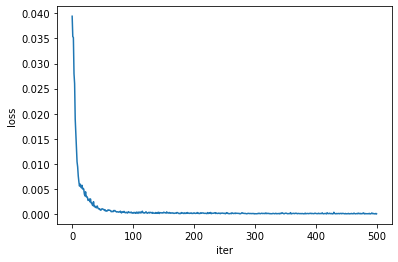

In [161]:
plt.plot(loss_list)
plt.xlabel('iter')
plt.ylabel('loss')
plt.show()

## Test

In [162]:
net.eval()

with torch.no_grad():
    input = torch.tensor(x_test[[0]].astype(np.float32))
    target = torch.tensor(y_test[[0]].astype(np.float32))
    output = net(input)

    print(target)
    print(output)

tensor([[3.2937e-11, 4.0629e-11, 7.0827e-11, 2.7094e-11, 7.4207e-11, 3.3888e-11,
         2.1562e-11, 2.6544e-11, 6.0804e-11, 1.5893e-11, 6.5975e-11, 2.1031e-11]])
tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])


In [163]:
net.eval()

with torch.no_grad():
    iters = 50
    mini_batch_size = 256
    mse_loss_list = []
    r2_score_list = []

    for i in range(iters):
        indices = np.random.choice(test_length, mini_batch_size)
        input = torch.tensor(x_test[indices].astype(np.float32))
        target = torch.tensor(y_test[indices].astype(np.float32))

        output = net(input)
        mse_loss_list.append(criterion(output, target))
        r2_score_list.append(r2_score(target, output))

        print(i, mse_loss_list[-1], r2_score_list[-1])

0 tensor(4.6244e-21) -1.5898303012588553
1 tensor(5.2354e-21) -1.5282351332122799
2 tensor(4.9995e-21) -1.595460915700311
3 tensor(6.0908e-21) -1.5579966582293778
4 tensor(5.4067e-21) -1.5278416968104318
5 tensor(5.3903e-21) -1.714540624608155
6 tensor(5.2002e-21) -1.7070714997298182
7 tensor(5.7425e-21) -1.5349709197793295
8 tensor(5.1216e-21) -1.5458383368754351
9 tensor(5.5208e-21) -1.5256407544076607
10 tensor(4.8071e-21) -1.5993870101212284
11 tensor(5.5017e-21) -1.5594973051749055
12 tensor(5.5699e-21) -1.5175210874503673
13 tensor(5.4024e-21) -1.5809628667857343
14 tensor(5.4324e-21) -1.541195532773618
15 tensor(5.2813e-21) -1.4959126025547433
16 tensor(5.9980e-21) -1.6033814188591287
17 tensor(6.8795e-21) -1.3156561719347621
18 tensor(5.2186e-21) -1.5235323433783368
19 tensor(5.4359e-21) -1.4921962612442428
20 tensor(5.4803e-21) -1.4412139379443818
21 tensor(5.7802e-21) -1.5242742647663112
22 tensor(5.7022e-21) -1.5044563232404151
23 tensor(6.5486e-21) -1.454412649743291
24 ten